<a href="https://colab.research.google.com/github/mart1428/CreditCardApplicationDecision/blob/main/CreditCardApplicationDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree

In [97]:
label_link = "https://docs.google.com/uc?export=download&id=1LKBLmwmyWJc1n8GBX5ZKu0yo7sZDmHjg"
data_link = "https://docs.google.com/uc?export=download&id=1A3Rs4JWB7evyPhptTsbcJmFcMm4gVwGR"

labels = pd.read_csv(label_link)
data = pd.read_csv(data_link)

# labels.set_index('Ind_ID')
# data.set_index('Ind_ID')


Exploratory Data Analysis

In [98]:
print(labels.head())
print(labels.shape)
print(data.head())
print(data.shape)

    Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1
(1548, 2)
    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / 

In [99]:
print(data[['Type_Income']].groupby(['Type_Income']).size(), '\n')
print(data[['GENDER']].groupby(['GENDER']).size(), '\n')
print(data[['Car_Owner']].groupby(['Car_Owner']).size(), '\n')
print(data[['Propert_Owner']].groupby(['Propert_Owner']).size(), '\n')
print(data[['EDUCATION']].groupby(['EDUCATION']).size(), '\n')
print(data[['Marital_status']].groupby(['Marital_status']).size(), '\n')
print(data[['Housing_type']].groupby(['Housing_type']).size(), '\n')
print(data[['EMAIL_ID']].groupby(['EMAIL_ID']).size(), '\n')
print(data[['Type_Occupation']].groupby(['Type_Occupation']).size(), '\n')


Type_Income
Commercial associate    365
Pensioner               269
State servant           116
Working                 798
dtype: int64 

GENDER
F    973
M    568
dtype: int64 

Car_Owner
N    924
Y    624
dtype: int64 

Propert_Owner
N     538
Y    1010
dtype: int64 

EDUCATION
Academic degree                     2
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Secondary / secondary special    1031
dtype: int64 

Marital_status
Civil marriage           101
Married                 1049
Separated                 96
Single / not married     227
Widow                     75
dtype: int64 

Housing_type
Co-op apartment           5
House / apartment      1380
Municipal apartment      53
Office apartment          9
Rented apartment         21
With parents             80
dtype: int64 

EMAIL_ID
0    1405
1     143
dtype: int64 

Type_Occupation
Accountants               44
Cleaning staff            22
Cooking staff            

In [100]:
print(data.dtypes)

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object


In [118]:

cols = data.columns.to_list()
columns_sorted = cols[:1] + cols[2:4] + cols[6:10] + cols[-2:-1] + cols[5:6] + cols[10:12] + cols[16:-2] + cols[-1:]
data_sorted = data[columns_sorted]


cat_cols = columns_sorted[1:8]
num_cols = columns_sorted[8:]
print(data_sorted.head())

data_sorted.replace('Nan', np.nan, inplace = True)

data_sorted[num_cols] = data_sorted[num_cols].apply(lambda x : x.astype(float))
print(data_sorted.dtypes)



    Ind_ID Car_Owner Propert_Owner           Type_Income         EDUCATION  \
0  5008827         Y             Y             Pensioner  Higher education   
1  5009744         Y             N  Commercial associate  Higher education   
2  5009746         Y             N  Commercial associate  Higher education   
3  5009749         Y             N  Commercial associate  Higher education   
4  5009752         Y             N  Commercial associate  Higher education   

  Marital_status       Housing_type Type_Occupation  Annual_income  \
0        Married  House / apartment        Laborers   180000.00000   
1        Married  House / apartment        Laborers   315000.00000   
2        Married  House / apartment        Laborers   315000.00000   
3        Married  House / apartment        Laborers   191399.32623   
4        Married  House / apartment        Laborers   315000.00000   

   Birthday_count  Employed_days  Family_Members  
0   -18772.000000       365243.0             2.0  
1   -135

<ipython-input-118-b13740824f7c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted.replace('Nan', np.nan, inplace = True)
<ipython-input-118-b13740824f7c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted[num_cols] = data_sorted[num_cols].apply(lambda x : x.astype(float))


In [119]:
numImputer = SimpleImputer(strategy='mean')
numImputer.fit(data_sorted[num_cols])
data[num_cols] = numImputer.transform(data[num_cols])

catImputer = SimpleImputer(strategy = 'most_frequent')
catImputer.fit(data_sorted[cat_cols])
data[cat_cols] = catImputer.transform(data[cat_cols])


In [120]:
encoder = OrdinalEncoder()
encoder.fit(data_sorted[cat_cols])
data_sorted[cat_cols] = encoder.transform(data_sorted[cat_cols])

<ipython-input-120-1de8cc8608d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted[cat_cols] = encoder.transform(data_sorted[cat_cols])


In [121]:
data_sorted.head()

,Ind_ID,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,Annual_income,Birthday_count,Employed_days,Family_Members
0,5008827,1.0,1.0,1.0,1.0,1.0,1.0,8.0,180000.00000,-18772.000000,365243.0,2.0
1,5009744,1.0,0.0,0.0,1.0,1.0,1.0,8.0,315000.00000,-13557.000000,-586.0,2.0
2,5009746,1.0,0.0,0.0,1.0,1.0,1.0,8.0,315000.00000,-16040.342071,-586.0,2.0
3,5009749,1.0,0.0,0.0,1.0,1.0,1.0,8.0,191399.32623,-13557.000000,-586.0,2.0
4,5009752,1.0,0.0,0.0,1.0,1.0,1.0,8.0,315000.00000,-13557.000000,-586.0,2.0


                   Ind_ID  Car_Owner  Propert_Owner  Type_Income  EDUCATION  \
Ind_ID           1.000000  -0.046811      -0.050421     0.026832   0.020761   
Car_Owner       -0.046811   1.000000       0.002401     0.033180  -0.131209   
Propert_Owner   -0.050421   0.002401       1.000000    -0.057481  -0.018622   
Type_Income      0.026832   0.033180      -0.057481     1.000000   0.100511   
EDUCATION        0.020761  -0.131209      -0.018622     0.100511   1.000000   
Marital_status   0.014426  -0.135318       0.004493    -0.032925   0.051966   
Housing_type     0.024882  -0.001358      -0.174783     0.025516  -0.044552   
Type_Occupation  0.049493  -0.082761       0.013962    -0.080690   0.040761   
Annual_income    0.029888   0.209528       0.043927    -0.132934  -0.243989   
Birthday_count   0.022778   0.144107      -0.124128     0.171432  -0.189547   
Employed_days   -0.055396  -0.150658       0.100686    -0.309174   0.128430   
Family_Members   0.016950   0.119851      -0.004458 

<Axes: >

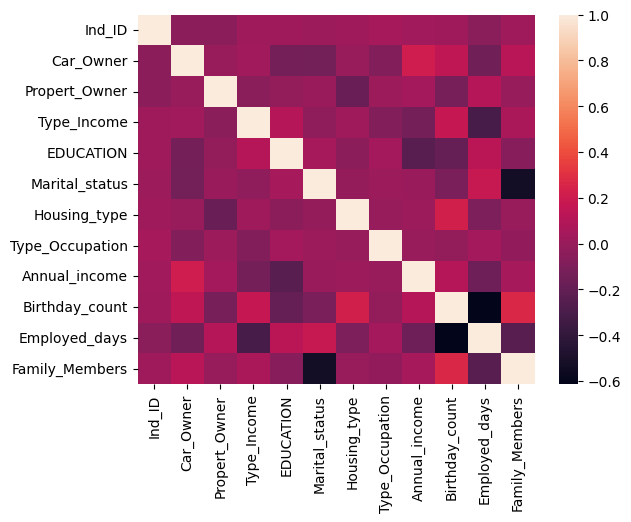

In [132]:
corrs = data_sorted.corr()
print(corrs)
sns.heatmap(corrs, annot = False)

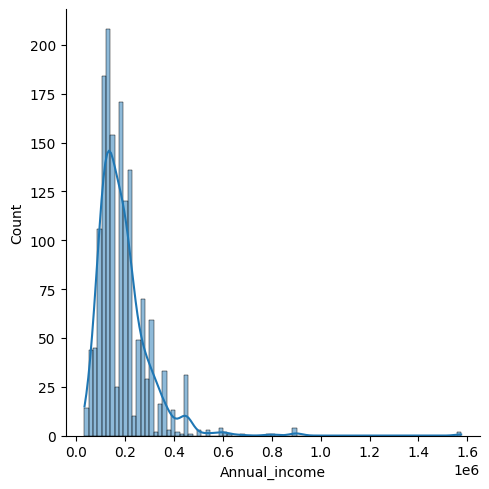

In [130]:
sns.displot(data = data_sorted.Annual_income, kde = True)

In [176]:
processed_data = pd.concat([data_sorted, labels], axis = 1, ignore_index = True,  keys = 'Ind_ID')
col_names = ['Ind_ID', 'CarOwner', 'PropertyOwner', 'IncomeType', 'Education', 'MaritalStatus', 'HousingType', 'OccupationType', 'AnnualIncome', 'Birthday', 'DaysEmployed', 'FamilyMembers', 'Ind_ID2', 'Rejected?']
processed_data.columns = col_names
processed_data.drop(['Ind_ID', 'Ind_ID2'], axis = 1, inplace = True)
print(processed_data.groupby('Rejected?').size())

Rejected?
0    1373
1     175
dtype: int64


In [190]:
split = 0.8
trueIndex = processed_data[processed_data['Rejected?'] == 1].index
trueIndexTrain = trueIndex[:int(0.8*len(trueIndex))]
trueIndexTest = trueIndex[int(0.8*len(trueIndex)):]

falseIndex = processed_data[processed_data['Rejected?'] == 0].index.to_list()
falseIndexTrain = falseIndex[:int(0.8*len(falseIndex))]
falseIndexTest = falseIndex[int(0.8*len(falseIndex)):]


In [191]:
split = int(0.8 * len(processed_data))
df_train, df_test = pd.concat([processed_data.iloc[trueIndexTrain], processed_data.iloc[falseIndexTrain]], axis = 0) , pd.concat([processed_data.iloc[trueIndexTest], processed_data.iloc[falseIndexTest]], axis = 0)

X_train, y_train = df_train.drop('Rejected?', axis = 1), df_train['Rejected?']
X_test, y_test = df_test.drop('Rejected?', axis = 1), df_test['Rejected?']

In [203]:
tree = sklearn.tree.DecisionTreeClassifier().fit(X_train, y_train)

tree_score = tree.score(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(f'The score is: {tree_score:.3f}')

The score is: 0.996


Recall score is: 0.2
Accuracy score is: 0.8258064516129032


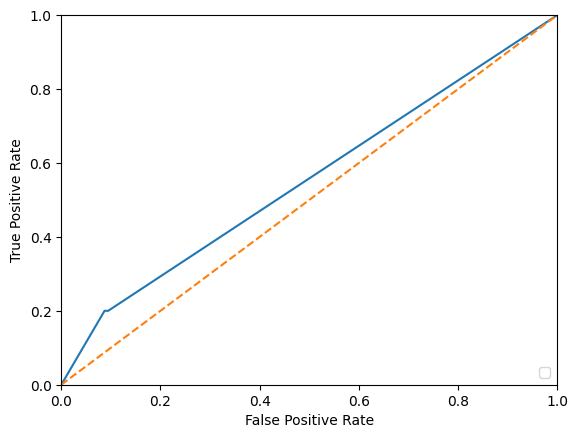

In [204]:
from sklearn.metrics import roc_curve, accuracy_score, recall_score

recall = recall_score(y_test, y_pred_tree)
print(f'Recall score is: {recall}')

acc = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy score is: {acc}')


fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
sns.lineplot(x = fpr, y= tpr)


# -------------------

# Plot format
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')  # add red line
plt.xlim([0.0, 1.0])  # limit x-axis between 0 and 1
plt.ylim([0.0, 1.0])  # limit y-axis between 0 and 1
plt.xlabel('False Positive Rate')  # lable for x axis
plt.ylabel('True Positive Rate')  # lable for y axis
plt.legend(loc='lower right')  # print legend in lower right corner
plt.show()